In [1]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from collections import Counter
import matplotlib.pyplot as plt
#logistic regression classifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [2]:
from ps1_functions import problem3_knn_classifier

In [3]:
#load prob3_data_seed.dat
data = np.genfromtxt('prob3_data_seed.dat')

X = data[:,0:6]
Y = data[:,7]
print(data)

[[15.26   14.84    0.871  ...  2.221   5.22    1.    ]
 [14.88   14.57    0.8811 ...  1.018   4.956   1.    ]
 [14.29   14.09    0.905  ...  2.699   4.825   1.    ]
 ...
 [13.2    13.66    0.8883 ...  8.315   5.056   3.    ]
 [11.84   13.21    0.8521 ...  3.598   5.044   3.    ]
 [12.3    13.34    0.8684 ...  5.637   5.063   3.    ]]


In [4]:
#min-max normalization of data columns
min = np.min(X, axis=0)
max = np.max(X, axis=0)
X = (X - min) / (max - min)

1; 5; 10; 15

In [5]:
def cross_validation(X, Y, k, folds = 5):
    """
    Leave one out cross validation for KNN classifier
    :param X: input data
    :param Y: class labels
    :param k: number of nearest neighbors
    :param folds: number of folds
    :return: accuracy
    """
    loss = list()
    X_folds = np.array_split(X, folds)
    Y_folds = np.array_split(Y, folds)

    for i in range(folds):
        hold_out = [j for j in range(X.shape[0]) if j != i]

        #combine hold_out from X_folds and Y_folds
        X_hold_out_train = np.concatenate(X_folds[:(i-1)] + X_folds[(i+1):], axis=0)
        Y_hold_out_train = np.concatenate(Y_folds[:(i-1)] + Y_folds[(i+1):], axis=0)

    # X_hold_out_train = [X_folds[j] for j in hold_out] 
        #X_hold_out_train = np.vstack(X_hold_out_train)
        #Y_hold_out_train = np.vstack(Y_folds[j] for j in hold_out)
        X_leave_out_test = X_folds[i]
        Y_leave_out_test  = Y_folds[i].flatten()
        
        Y_predicted = problem3_knn_classifier(X_hold_out_train, Y_hold_out_train, X_leave_out_test, k).flatten()
        
        loss_i = np.mean(Y_predicted != Y_leave_out_test)
        #print('Leave out: ', leave_out, 'Loss: ', loss_i)
        loss.append(loss_i)

    #average of loss
    return np.mean(loss)

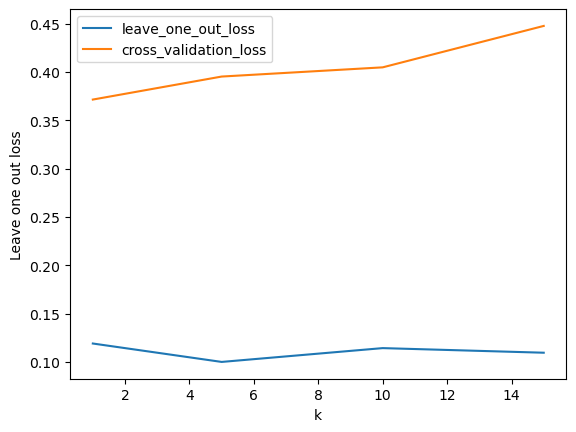

In [6]:
ks = [1, 5, 10, 15]
cross_validation_loss = [cross_validation(X, Y, k, folds = 5) for k in ks]
#
leave_one_out_loss = [cross_validation(X, Y, k, folds = X.shape[0]) for k in ks]
#plot leave_one_out_loss and cross_validation_loss on same plot
plt.plot(ks, leave_one_out_loss, label='leave_one_out_loss')
plt.plot(ks, cross_validation_loss, label='cross_validation_loss')
plt.legend()
plt.xlabel('k')
plt.ylabel('Leave one out loss')
plt.show()

Problem 2 c

In [7]:
def cross_validation_general(X, Y, classifier, cv = 5):
    """
    Leave one out cross validation for KNN classifier
    :param X: input data
    :param Y: class labels
    :param k: number of nearest neighbors
    :param cv: number of folds
    :return: accuracy
    """
    test_loss = list()
    train_loss = list()

    X_folds = np.array_split(X, cv)
    Y_folds = np.array_split(Y, cv)

    for i in range(cv):
        hold_out = [j for j in range(X.shape[0]) if j != i]

        #combine hold_out from X_folds and Y_folds
        X_hold_out_train = np.concatenate(X_folds[:(i-1)] + X_folds[(i+1):], axis=0)
        Y_hold_out_train = np.concatenate(Y_folds[:(i-1)] + Y_folds[(i+1):], axis=0)

        X_leave_out_test = X_folds[i]
        Y_leave_out_test  = Y_folds[i].flatten()
        
        classifier.fit(X_hold_out_train, Y_hold_out_train)
        
        Y_predicted_test = classifier.predict(X_leave_out_test).flatten()
        Y_predicted_train = classifier.predict(X_hold_out_train).flatten()
            
        test_loss_i = np.mean(Y_predicted_test != Y_leave_out_test)
        train_loss_i = np.mean(Y_predicted_train != Y_hold_out_train)

        #print('Leave out: ', leave_out, 'Loss: ', loss_i)
        test_loss.append(test_loss_i)
        train_loss.append(train_loss_i)

    #average of loss
    test_loss = np.mean(test_loss)
    train_loss = np.mean(train_loss)
    #print('Test loss: ', test_loss, 'Train loss: ', train_loss)

    return test_loss, train_loss

In [8]:
cross_validation_general(X, Y, classifier = LogisticRegression())

(0.4619047619047619, 0.07281746031746031)

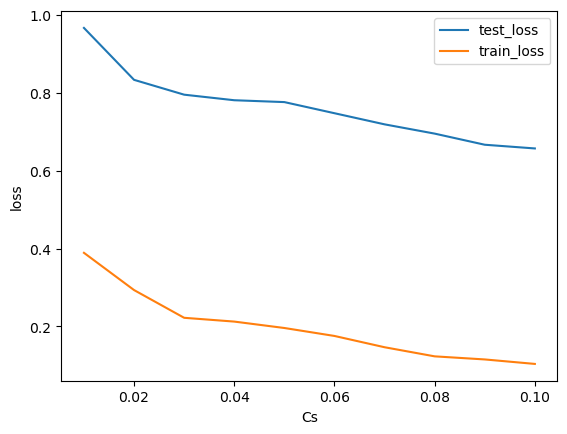

In [10]:
#sequence from 0.01 to 0.1 with 10 steps
Cs = np.linspace(0.01, 0.1, 10)

cross_validation_loss = [cross_validation_general(X, Y, classifier = SVC(kernel="linear", C = C_i)) for C_i in Cs]
cross_validation_loss = np.vstack(cross_validation_loss)

plt.plot(Cs, cross_validation_loss[:,0], label='test_loss')
plt.plot(Cs, cross_validation_loss[:,1], label='train_loss')
plt.legend()
plt.xlabel('Cs')
plt.ylabel('loss')
plt.show()

Problem 3

In [12]:
#sigmoid function
def perceptron(x):
    return np.where(x > 0, 1, 0)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))
    

translate 

In [13]:
W_1 = np.array([[0.6, 0.5, -0.6], [-0.7, 0.4, 0.8]])
W_2 = np.array([[1, 1]])

b_1 = np.array([-0.4, -0.5])
b_2 = np.array([-0.5])

In [14]:
def simple_neural_network(input, W_1, W_2, b_1, b_2, activation_function = sigmoid):
    #print('input: ', input)
    Z_1 = np.dot(W_1, input) + b_1
    #print('Z_1: ', Z_1)
    A_1 = activation_function(Z_1)
    #print('A_1: ', A_1)

    Z_2 = np.dot(W_2, A_1) + b_2
    #print('Z_2: ', Z_2)

    A_2 = activation_function(Z_2)
    #print('A_2: ', A_2)
    
    return A_2

In [15]:
#matrix
X0 = np.array([0,0,0]).T
X1 = np.array([1,0,0]).T
X2 = np.array([0,1,0]).T
X3 = np.array([0,0,1]).T
X4 = np.array([1,1,0]).T
X5 = np.array([1,0,1]).T
X6 = np.array([0,1,1]).T
X7 = np.array([1,1,1]).T

Xs = [X0, X1, X2, X3, X4, X5, X6, X7]

output of perceptron 

problem 4.3

In [16]:
output  = [simple_neural_network(X_i, W_1 = W_1, W_2 = W_2, b_1 = b_1, b_2 = b_2, activation_function = perceptron) for X_i in Xs]
for i in range(len(Xs)):
    print('X: ', Xs[i], 'output: ', output[i])

X:  [0 0 0] output:  [0]
X:  [1 0 0] output:  [1]
X:  [0 1 0] output:  [1]
X:  [0 0 1] output:  [1]
X:  [1 1 0] output:  [1]
X:  [1 0 1] output:  [0]
X:  [0 1 1] output:  [1]
X:  [1 1 1] output:  [1]


output of sigmoid nn, problem 4.4

In [17]:
output  = [simple_neural_network(X_i, W_1 = W_1, W_2 = W_2, b_1 = b_1, b_2 = b_2, activation_function = sigmoid) for X_i in Xs]
for i in range(len(Xs)):
    print('X: ', Xs[i], 'output: ', output[i])

X:  [0 0 0] output:  [0.569265]
X:  [1 0 0] output:  [0.56986717]
X:  [0 1 0] output:  [0.62245933]
X:  [0 0 1] output:  [0.58501229]
X:  [1 1 0] output:  [0.61732588]
X:  [1 0 1] output:  [0.57508402]
X:  [0 1 1] output:  [0.63314399]
X:  [1 1 1] output:  [0.62831133]


Problem 4.5

list two-digit binary numbers as two-dimensional binary vectors

In [18]:
X0= np.array([0,0]).T
X1= np.array([1,0]).T
X2= np.array([0,1]).T
X3= np.array([1,1]).T
Xs = [X0, X1, X2, X3]

single digit addition as neural network

In [19]:
def single_digit_binary_addition(input):
    W_1 = np.array([[1,0,2], [0,1,2]]).T
    W_2 = np.array([[0,0,1],[1, 1,-2]])

    b_1 = np.array([0,0,-3])
    b_2 = np.array([0,0])
    return simple_neural_network(input, W_1 = W_1, W_2 = W_2, b_1 = b_1, b_2 = b_2, activation_function = perceptron)

In [24]:
[print(X_i[0]," + ", X_i[1]," = ", single_digit_binary_addition(X_i)) for X_i in Xs];

0  +  0  =  [0 0]
1  +  0  =  [0 1]
0  +  1  =  [0 1]
1  +  1  =  [1 0]


concatenate `single_digit_binary_addition`multiple times

In [21]:
def two_digit_binary_addition(binary_number_1, binary_number_2):
    #first digit
    N1 = single_digit_binary_addition(np.array([binary_number_1[1-0], binary_number_2[1-0]]))
    D0 = N1[1-0]
    #second digit
    N2 = single_digit_binary_addition(np.array([binary_number_1[1-1], binary_number_2[1-1]]))
    N3 = single_digit_binary_addition(np.array([N2[1-0], N1[1-1]]))
    D1 = N3[1-0]
    #third digit
    N4 = single_digit_binary_addition(np.array([N2[1-1], N3[1-1]]))
    D2 = N4[1-0]

    sum_result = np.array([D2, D1, D0])
    return sum_result

In [23]:
[[print(binary_number_1," + ", binary_number_2," = ", two_digit_binary_addition(binary_number_1, binary_number_2)) for binary_number_1 in Xs] for binary_number_2 in Xs];

[0 0]  +  [0 0]  =  [0 0 0]
[1 0]  +  [0 0]  =  [0 1 0]
[0 1]  +  [0 0]  =  [0 0 1]
[1 1]  +  [0 0]  =  [0 1 1]
[0 0]  +  [1 0]  =  [0 1 0]
[1 0]  +  [1 0]  =  [1 0 0]
[0 1]  +  [1 0]  =  [0 1 1]
[1 1]  +  [1 0]  =  [1 0 1]
[0 0]  +  [0 1]  =  [0 0 1]
[1 0]  +  [0 1]  =  [0 1 1]
[0 1]  +  [0 1]  =  [0 1 0]
[1 1]  +  [0 1]  =  [1 0 0]
[0 0]  +  [1 1]  =  [0 1 1]
[1 0]  +  [1 1]  =  [1 0 1]
[0 1]  +  [1 1]  =  [1 0 0]
[1 1]  +  [1 1]  =  [1 1 0]


In [ ]:
#fibonacci sequence
def fibonacci_sequence(n):
    #first two numbers
    a = 0
    b = 1
    #print(a)
    #print(b)
    #print(a+b)
    for i in range(n-2):
        c = a + b
        #print(c)
        a = b
        b = c
    return c

        

In [ ]:
import stats
#power analysis for linear mixed model
def power_analysis_linear_mixed_model(n = 86, k = 3, sigma=-.18, sigma_e = .07, alpha = 0.01):
    #n = number of subjects
    #k = number of predictors
    #sigma = effect size
    #sigma_e = error variance
    #alpha = significance level
    #beta = 1 - alpha
    beta = 1 - alpha
    #F = F-statistic
    F = (sigma**2 / sigma_e**2) * ((n - 1) / k)
    #F_alpha = critical value of F
    F_alpha = stats.f.ppf(beta, k, n - k - 1)
    #power = 1 - beta
    power = 1 - stats.f.cdf(F, k, n - k - 1)
    return power

